# Solving ODEs: Numpy Arrays and 2D Problems

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## More array-based programming with numpy

We have discussed the utility of numpy arrays several times in this class, but they will become even more important as we start solving problems in more than one dimension. It is thus worth some extra practice. Sometimes we know in advance the size and shape of something we need to compute, but we need to make a calculation on each element in sequence. 

As an example, consider the Fibonacci sequence. The first two numbers in the Fibonacci sequence are 0 and 1, and each subsequent Fibonacci number is the sum of the two numbers before it in the sequence. How could implement the Fibonacci sequence using numpy arrays?

&#128309; Implement a function `fibonacci` that takes a number `n_values` and returns a Fibonacci sequence of that length using numpy arrays, following the comments below.

In [3]:
def fibonacci(n_values):
    # Initialize a numpy array fib of length n_values, and type int (integer)
    fib = np.zeros((n_values,), dtype=int)

    # Set the first two elements of fib to 0 and 1, respectively
    fib[0], fib[1] = 0, 1

    # Write a for loop that steps through the other elements of fib and fills each element with the sum of the two between it
    for index in range(2, len(fib)): 
        fib[index] = fib[index -2] + fib[index -1]

    # Return fib
    return fib

&#128309; Test `fibonacci` and be sure it is working as expected.

In [4]:
fibonacci(15)
# expect 34 to be the 10th value in the sequence! ✅

array([  0,   1,   1,   2,   3,   5,   8,  13,  21,  34,  55,  89, 144,
       233, 377])

This is not the only way to implement a function that returns values from the Fibonacci sequence, of course. It is meant to give you some practice with array indexing -- referencing particular elements in your array.

&#128309; Let's say for some reason that what you really need is every *other* value in the Fibonacci sequence. Use your function to return a numpy array `arr` containing the first 30 values of the Fibonnaci sequence, and then print every other element of your array using `arr[::2]`.

In [5]:
arr = fibonacci(30)
print(arr[::2])

[     0      1      3      8     21     55    144    377    987   2584
   6765  17711  46368 121393 317811]


The syntax for this array indexing is `start:stop:step`. The index `0` refers to the first element of your array, and the index `-1` refers to the last element. A negative step will index backward through your array.

&#128309; Print `arr` backward by 3's starting with the second-to-last element in the array. 

In [6]:
print(arr[-2::-3])

[317811  75025  17711   4181    987    233     55     13      3      1]


Indexing a numpy array with `:` means "all elements along this dimension". For example, let's arrange the numbers 1-12 into a 4x3 array:

In [7]:
seq = np.arange(1, 13).reshape(4, 3)
print(seq)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


&#128309; Think about what you expect `seq[:, 2]` to print. Then print it and see if it is what you expect.

In [8]:
# expect 3rd column
print(seq[:, 2])

[ 3  6  9 12]


&#128309; Play around with this array indexing until it makes sense to you. 

In [9]:
seq[1, :] # show only second row
seq[:, :] # show entire array
seq[2, 2] # show 3rd by 3rd element = 9

9

## Applying Runge-Kutta to a 2D problem

Let's extend what we worked on in the "Solving ODEs" notebook to a two-dimensional problem, where working with numpy arrays becomes even more obviously useful. We will use our favorite example: you are lost at sea. Fortunately we have some knowledge of the ocean currents near your last known location. We will use Runge-Kutta methods to integrate forward in time and figure out where to look for you.

We will study your position as a function of $\bar{x} = [x, y]$, your coordinates in 2D space. 

&#128309; First we will create a grid of x, y coordinates. Use `np.linspace` and `np.meshgrid` to create 20 x 20 grids of x and y coordinates called `x` and `y`, where x and y each have the range [-30, 30]. 

In [10]:
x, y = np.linspace(-30, 30, 20), np.linspace(-30, 30, 20)
X, Y = np.meshgrid(x, y)

&#128309; Picture what `x` and `y` should each look like. Use `plt.imshow` to display either your x or y array. Make sure your plot looks as expected.

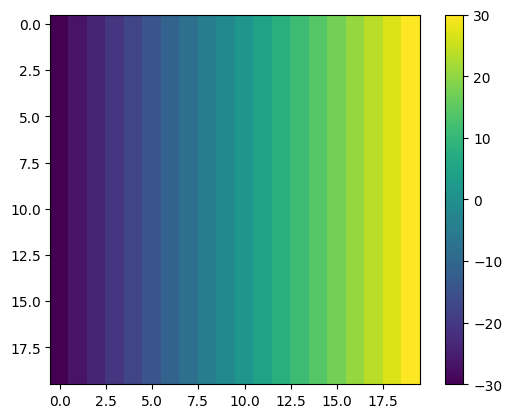

In [20]:
plt.imshow(X)
plt.colorbar()
plt.show()

# expect the plot to increase from -30 to 30 in color as x increases and have no correlation with y. 

The ocean surface currents in this region are defined by
$$\frac{dx}{dt} = - 3x^3 + 5y^3 + 1$$
$$\frac{dy}{dt} = x^4 + 3y^3 + 2$$

&#128309; Compute the velocity field components `v_x` and `v_y` by applying the equations for the ocean surface currents to your arrays `x` and `y`.

In [12]:
v_x = -3*X**3 + 5*Y**3 + 1
v_y = X**4 + 3*Y**3 + 2

&#128309; We will now plot the velocity field using `plt.quiver`. Your plot will look best if we normalize the vector lengths, so let's first compute the magnitude of each of our vectors in our vector field. Implement this following the skeleton code below.

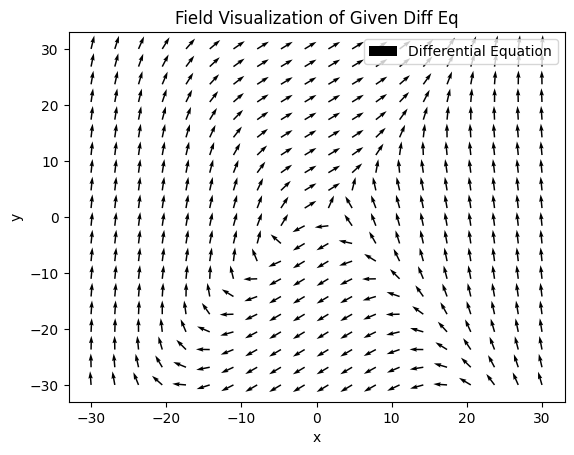

In [21]:
# Compute the magnitude of v
norm = np.sqrt(v_x**2 + v_y**2)

# Plot the vector field. Feel free to add a color to the quiver call.
plt.quiver(x, y, v_x/norm, v_y/norm, label="Differential Equation")

# Label your x and y axes 'x' and 'y'
plt.xlabel("x")
plt.ylabel("y")
plt.title("Field Visualization of Given Diff Eq")
plt.legend()
plt.show()


&#128310; Your last known location was at $(x_0, y_0) = (0, -20)$. Find this on the quiver plot and describe in words where you think your boat floated. 

With this starting point, I would've drifted off towards (-10, -30) given that's where the field point for me to head towards. 

&#128309; Initialize your last known location as a length 2 numpy array.

In [14]:
xvec0 = np.array([0, -20])

In the last class, you successfully implemented a second-order Runge-Kutta integrator, so I will give you one here. Feel free to replace it with your own code. Note that this one is simpler than what you implemented last class, because we will use a function that does not depend explicitly on time. 

In [15]:
def rk2step(func, xk, deltat):
    f1 = func(xk)
    f2 = func(xk + 0.5*deltat*f1)
    return xk + deltat*f2

&#128309; Implement a function `dxdt` that takes an input variable `xvec`, a length-2 array representing your (x,y) position vector. Note that your velocity field  does not depend explicitly on time, so you do not actually need to pass `t` here -- you could, of course, write this in a way that has the option of handling time, for compatibility with the RK integrators you have already written. Your function will return `vvec`, a length-2 array. Implement this function following the starter code below.

In [16]:
def dxdt(xvec):
    vvec = np.zeros(2)
    vvec[0] = -3*xvec[0]**3 + 5*xvec[1]**3 + 1 # implement diff eq x_value
    vvec[1] = xvec[0]**4 + 3*xvec[1]**3 + 2 # implement diff eq y_vallue
    return vvec

&#128309; Implement a function `solve_rk` that takes as inputs a function `func`, a length-2 array `x0` representing the starting $(x_0, y_0)$, a `deltat`, and an `N` representing the number of timesteps. Follow the starter code below.

In [17]:
def solve_rk(func, x0, deltat, N):

    # Initialize x as an array of zeros with shape (2, N)
    x = np.zeros((2, N))

    # Populate the first elements in the x array with x0. Remember that x0 is a vector! You will need to use a colon to index x.
    # Your code here
    x[:, 0] = x0

    # Step through the rest of your N timesteps and fill in values of x as you go
    for i in range(N-1):
        # Call your Runge-Kutta integrator
        x[:, i+1] = rk2step(func, x[:, i], deltat)
        
    return x

&#128309; Use your function to evolve your position forward in time for 90 timesteps with `deltat = 1E-5`. Store the output as a numpy array called `x_path`. 

In [18]:
N = 90
deltat = 1E-5
x_path = solve_rk(dxdt, xvec0, deltat, N) # use solving range-kutta method with defined diff eq

&#128309; Plot your surface velocity field again, and plot your path on top of it as a scatter plot. 
*Optional:* Feel free to use your color-coding trick from the Solving ODEs notebook to color-code your scatter points by timestep if you would like. 

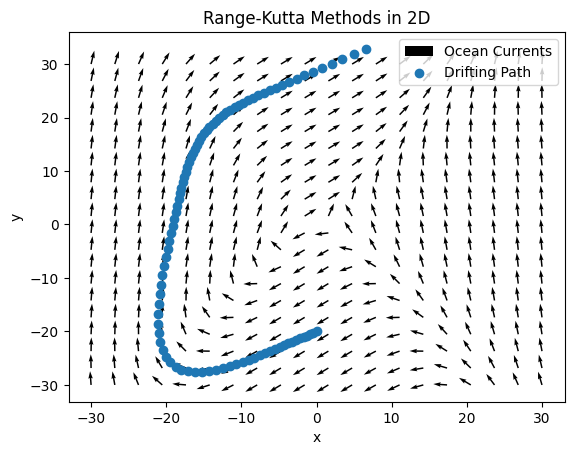

In [19]:
plt.quiver(X, Y, v_x/norm, v_y/norm, label="Ocean Currents")
plt.scatter(x_path[0], x_path[1], label="Drifting Path")

plt.xlabel("x")
plt.ylabel("y")

plt.title("Range-Kutta Methods in 2D")

plt.legend()
plt.show()

&#128310; Comment on your solution. Does it look how you expected? Why or why not? 

This is not what I expected! Although it follows the paths, visually, I thought that the path would continue downwards and to the right leaving the screen. This does make sense, and could be a reuslt of the arrow density on our visualization of the vector field. A more dense vector field visualization would indicate that there were some more arrows pointing upwards. 

## Acknowledgments

S.E. Clark 2024